In [76]:
from vega import VegaLite
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv('Saturday.csv', parse_dates=['time'])
df['wind_angle'] = np.arctan2(df.wind_y, df.wind_x)
df['wind_speed'] = np.sqrt(df.wind_x **2 + df.wind_y **2)
df

time               time.1     id          dd  \
0     2021-08-21 09:40:26  2021-08-21 09:40:26  44507  2021/08/21   
1     2021-08-21 09:40:27  2021-08-21 09:40:27  44507  2021/08/21   
2     2021-08-21 09:40:28  2021-08-21 09:40:28  44507  2021/08/21   
3     2021-08-21 09:40:29  2021-08-21 09:40:29  44507  2021/08/21   
4     2021-08-21 09:40:30  2021-08-21 09:40:30  44507  2021/08/21   
...                   ...                  ...    ...         ...   
11437 2021-08-21 14:29:56  2021-08-21 14:29:56  44507  2021/08/21   
11438 2021-08-21 14:29:57  2021-08-21 14:29:57  44507  2021/08/21   
11439 2021-08-21 14:29:58  2021-08-21 14:29:58  44507  2021/08/21   
11440 2021-08-21 14:29:59  2021-08-21 14:29:59  44507  2021/08/21   
11441 2021-08-21 14:30:00  2021-08-21 14:30:00  44507  2021/08/21   

                    tt code  pressure  temperature    RH  RH_temp  ...  \
0      21:43:51.552947   XQ   92834.0         9.82  67.1    10.97  ...   
1      21:43:51.578950   XQ   92791.0         9.99  67.8    11.01  ...   
2      21:43:51.604991   XQ   92769.0        10.03  68.1    11.04  ...   
3      21:43:51.631253   XQ   92762.0         9.91  68.3    11.04  ...   
4      21:43:51.656963   XQ   92774.0         9.87  68.5    11.05  ...   
...                ...  ...       ...          ...   ...      ...  ...   
11437  21:51:22.214934   XQ   96088.0        15.55  43.7    16.35  ...   
11438  21:51:22.240877   XQ   96111.0        15.58  43.6    16.35  ...   
11439  21:51:22.266796   XQ   96123.0        15.59  43.3    16.35  ...   
11440  21:51:22.292732   XQ   96129.0        15.63  43.3    16.37  ...   
11441  21:51:22.318684   XQ   96130.0        15.70  43.4    16.39  ...   

             dx        dy    course        dc  turning    wind_x    wind_y  \
0     -2.625649 -4.474053 -2.101499  0.011730    False -1.019490  2.122258   
1     -2.621839 -4.590070 -2.089769  0.016666    False -1.019490  2.122258   
2     -2.610278 -4.808096 -2.068166  0.024896    False -1.019490  2.122258   
3     -2.586031 -5.101317 -2.039976  0.029435    False -1.019490  2.122258   
4     -2.548128 -5.433695 -2.009296  0.029718    False -1.019490  2.122258   
...         ...       ...       ...       ...      ...       ...       ...   
11437 -2.811135  6.930117  1.956156  0.002788    False -2.911838  7.477287   
11438 -2.831229  6.905600  1.959885  0.004463    False -2.783998  7.477509   
11439 -2.850378  6.850674  1.965081  0.005727    False -2.779703  7.471498   
11440 -2.862461  6.760120  1.971339  0.006775    False -2.783972  7.451623   
11441 -2.869778  6.642088  1.978631  0.008067    False -2.785055  7.458503   

          labels  wind_angle  wind_speed  
0      683381046    2.018625    2.354430  
1      683381046    2.018625    2.354430  
2      683381046    2.018625    2.354430  
3      683381046    2.018625    2.354430  
4      683381046    2.018625    2.354430  
...          ...         ...         ...  
11437  683381053    1.942153    8.024252  
11438  683381053    1.927212    7.978959  
11439  683381053    1.926970    7.971827  
11440  683381053    1.928344    7.954696  
11441  683381053    1.928169    7.961520  

[11442 rows x 37 columns]

<AxesSubplot:>

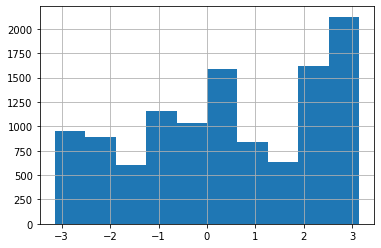

In [85]:
df.wind_angle.hist()

<AxesSubplot:>

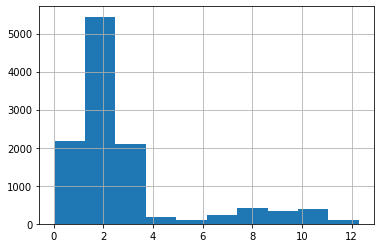

In [87]:
df.wind_speed.hist()

In [91]:
VegaLite(
{
   "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "title": "Wind over time",
  "vconcat": [
    {
      "width": 800,
      "description": "Wind over time.",
      "params": [
        {"name": "brush", "select": {"type": "interval", "encodings": ["x"]}}
      ],
      "mark": "point",
      "encoding": {
        "x": {"field": "time", "type": "temporal"},
        "y": {"field": "altitude", "type": "quantitative"},
        "color": { 
          "field": "wind_speed", 
          "type": "quantitative",
          "scale": { 
            "scheme": "greens", 
            "reverse": false 
          } 
        }
      }
    },
    {
      "width": 800,
      "height": 800,
      "description": "Wind over time.",
      "mark": { 
        "type": "text", 
        "fontSize": 35,
        "theta": 1
      },
      "encoding": {
        "text": { "value": "➟"},
        "angle": { 
          "field": "wind_angle", 
          "type": "quantitative",
          "scale": { 
            "type": "linear", 
            "range": [180, -180]
            }
          },
        "latitude": {"field": "latitude", "type": "quantitative"},
        "longitude": {"field": "longitude", "type": "quantitative"}, 
        "tooltip": [
          {"type": "quantitative", "field": "vario"}
        ],
        "color": { 
          "condition": {
            "param": "brush",
            "field": "wind_speed",
            "type": "quantitative",
            "scale": {
              "domain": [0, 4],
              "scheme": "greens"
            }
          },
          "value": "grey" 
        },
        "size": {
          "value": 10,
           "condition": {
             "param": "brush",
             "empty": false,
             "field": "wind_speed",
             "type": "quantitative",
             "scale": { "domain": [0, 4] }
           }
        }
      }
    }
  ]
}, df.iloc[:5000]
)

NameError: name 'false' is not defined

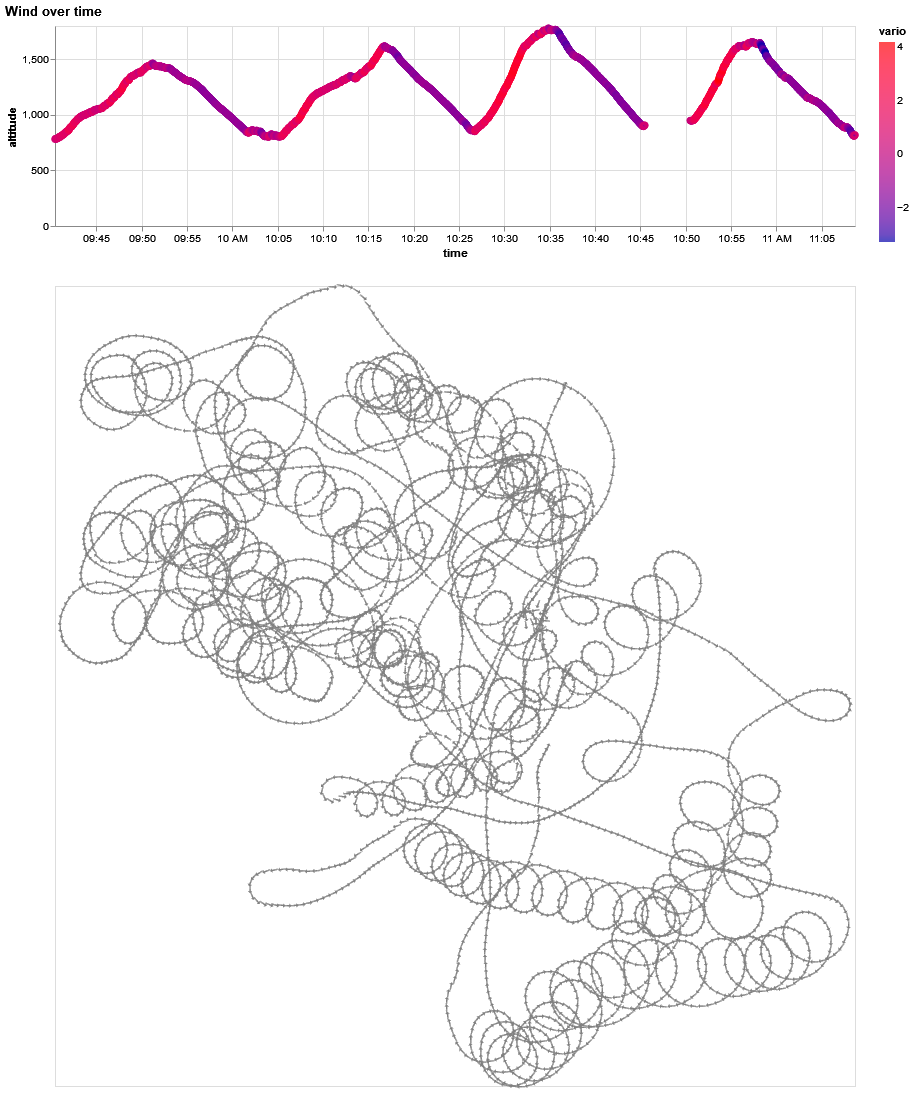

In [89]:
VegaLite(
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
  "title": "Wind over time",
  "vconcat": [
    {
      "width": 800,
      "description": "Wind over time.",
      "params": [
        {"name": "brush", "select": {"type": "interval", "encodings": ["x"]}}
      ],
      "mark": "point",
      "encoding": {
        "x": {"field": "time", "type": "temporal"},
        "y": {"field": "altitude", "type": "quantitative"},
        "color": { "field": "vario", "type": "quantitative",
                   "scale": {"range": ["#0000AA","#FF0000"] } }
      }
    },
    {
      "width": 800,
      "height": 800,
      "description": "Wind over time.",
      "mark": { 
        "type": "text", 
        "fontSize": 35,
        "theta": 1
      },
      "encoding": {
        "text": { "value": "➟"},
        "angle": { 
          "field": "course", 
          "type": "quantitative",
          "scale": { 
            "type": "linear", 
            "range": [180, -180]
            }
          },
        "latitude": {"field": "latitude", "type": "quantitative"},
        "longitude": {"field": "longitude", "type": "quantitative"}, 
        "tooltip": [
          {"type": "quantitative", "field": "vario"}
        ],
        "color": { 
          "value": "grey" 
        },
        "size": {
          "value": 10
        }
      }
    }
  ]
}, df.iloc[:5000]
)